## Import related module

In [1]:
import csv
import math
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from itertools import combinations
from operator import itemgetter
from collections import Counter
import collections
%matplotlib inline

## Read file

In [2]:
index=pd.read_csv('Filmandactor.csv')
index.head()

Actor                         Film  Year   Genre  Gender  \
0      Amai Kamarudin  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
1        Josiah Hogan  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
2  Shaharuddin Thamby  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
3   Sharifah Shahirah  7 Hari Kisah Cinta Langkawi  2019  Comedy  Female   
4           Chi Azim   7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   

   Races  Debut year  
0  Malay        2008  
1  Malay        2013  
2  Malay        1989  
3  Malay        1993  
4  Malay        2019

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


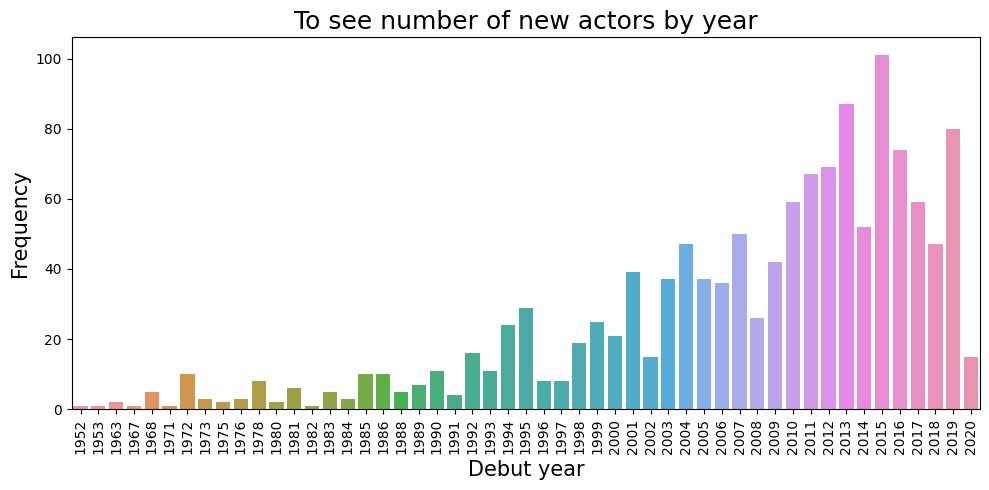

In [3]:
# make barplot
#order=index.sort_values('Debut year')
#index['Debut year'].value_counts().plot(kind='bar',figsize=(10,8))
plt.figure(figsize=(10, 5))
sns.countplot(index['Debut year'])
# set labels
plt.xticks(rotation=90)
plt.xlabel("Debut year", size=15)
plt.ylabel("Frequency", size=15)
plt.title("To see number of new actors by year", size=18)
plt.tight_layout()

## Calculate career year the actor has been in the industry

In [4]:
def year(row):
    return 2020 - row['Debut year']

index['Career year'] = index.apply(year, axis=1)
index.head()

Actor                         Film  Year   Genre  Gender  \
0      Amai Kamarudin  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
1        Josiah Hogan  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
2  Shaharuddin Thamby  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
3   Sharifah Shahirah  7 Hari Kisah Cinta Langkawi  2019  Comedy  Female   
4           Chi Azim   7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   

   Races  Debut year  Career year  
0  Malay        2008           12  
1  Malay        2013            7  
2  Malay        1989           31  
3  Malay        1993           27  
4  Malay        2019            1

## Calculate total films for each actors

In [5]:
new_index = index.Actor.value_counts().rename_axis('Actor').to_frame('Total film')
index = pd.merge(index,new_index,on ='Actor',how ='outer') #merge output column into original data frame
index

Actor                         Film  Year   Genre  Gender  \
0     Amai Kamarudin  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
1     Amai Kamarudin                Temuan Takdir  2016   Crime    Male   
2       Josiah Hogan  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
3       Josiah Hogan             KL Special Force  2018  Action    Male   
4       Josiah Hogan                  KL Vampires  2019  Action    Male   
...              ...                          ...   ...     ...     ...   
1296       Dain Said                         Wira  2019  Action    Male   
1297       Fify Azmi                         Wira  2019  Action  Female   
1298     Hilal Azman                         Wira  2019  Action    Male   
1299    Yayan Ruhian                         Wira  2019  Action    Male   
1300  Serina Redzuan                  Zack Kapcai  2016  Comedy  Female   

       Races  Debut year  Career year  Total film  
0      Malay        2008           12           2  
1      Malay        2008           12           2  
2      Malay        2013            7           6  
3      Malay        2013            7           6  
4      Malay        2013            7           6  
...      ...         ...          ...         ...  
1296   Malay        2011            9           1  
1297   Malay        2019            1           1  
1298   Malay        1983           37           1  
1299  Others        2009           11           1  
1300   Malay        2002           18           1  

[1301 rows x 9 columns]

## Calculate total genre for each actor

In [6]:
def gen(series):
    _, cnt = np.unique(series, return_counts=True)
    b=cnt
    return len(b)

genre = index.groupby('Actor').agg({'Genre': gen})
df = pd.DataFrame (genre, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'Total Genre'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index

Actor                                      Film  Year   Genre  \
93        A. Galak                        Abang Long Fadil 2  2017  Comedy   
94        A. Galak                     Lu Mafia Gua Gangster  2016  Comedy   
95        A. Galak                                   Munafik  2016  Horror   
956    A. R. Badul                              Kerja Kahwin  2017  Comedy   
96        AC Mizal                        Abang Long Fadil 2  2017  Comedy   
...            ...                                       ...   ...     ...   
781    Zul Ariffin                                J Revolusi  2017  Action   
784    Zul Ariffin                  Tombiruo: Penunggu Rimba  2017  Action   
1052  Zul Huzaimy   Mat Moto: Kami Mat Moto Bukan Mat Rempit  2016  Action   
465     Zulin Aziz                                    Rembat  2015  Comedy   
464     Zulin Aziz                                   Bo-Peng  2016  Comedy   

      Gender  Races  Debut year  Career year  Total film  Total Genre  
93      Male  Malay        1981           39           3            2  
94      Male  Malay        1981           39           3            2  
95      Male  Malay        1981           39           3            2  
956     Male  Malay        1978           42           1            1  
96      Male  Malay        1999           21           1            1  
...      ...    ...         ...          ...         ...          ...  
781     Male  Malay        2010           10           5            3  
784     Male  Malay        2010           10           5            3  
1052    Male  Malay        2002           18           1            1  
465   Female  Malay        2014            6           2            1  
464   Female  Malay        2014            6           2            1  

[1301 rows x 10 columns]

## Race and gender of actors

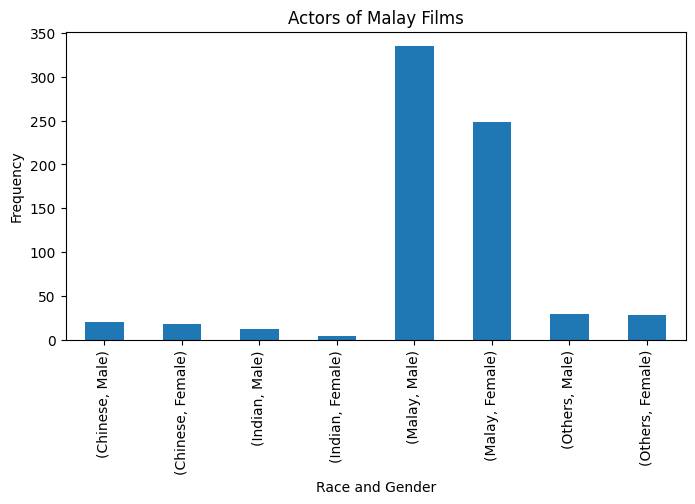

In [7]:
# sorting by first name
race=index.copy()
race.sort_values("Actor", inplace = True)
# dropping ALL duplicate actor's name
race.drop_duplicates(subset ="Actor",keep = "first", inplace = True)
freq=race.groupby(['Races'])['Gender'].value_counts()
freq.plot(kind='bar', title='Actors of Malay Films', ylabel='Frequency',
         xlabel='Race and Gender', figsize=(8, 4))
plt.savefig('Figure A2.jpg',dpi=500,bbox_inches = 'tight')

## Exclude actors with one film

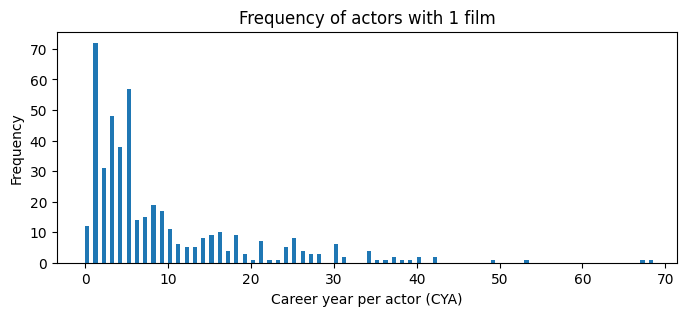

In [8]:
act1=index[index['Total film']==1]
fig, ax = plt.subplots(figsize=(8, 3))
act1["Career year"].plot(kind = 'hist',align='mid',bins=10000,width=0.5)
plt.xlabel("Career year per actor (CYA)")
plt.title(label="Frequency of actors with 1 film",loc="center")
plt.savefig('Figure A1.jpg',dpi=500,bbox_inches = 'tight')

In [9]:
# remove rows by filtering
index.drop(index.loc[index['Total film']==1].index, inplace=True)
# display the dataframe
index.to_csv('Filmandactor_1.csv', index=False) #save to new file
index

Actor                          Film  Year     Genre  Gender  Races  \
93      A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
94      A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
95      A. Galak                       Munafik  2016    Horror    Male  Malay   
935   Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
933   Aaron Aziz                 Kau Yang Satu  2017  Romantic    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
780  Zul Ariffin            Hantu Kak Limah 3   2018    Comedy    Male  Malay   
781  Zul Ariffin                    J Revolusi  2017    Action    Male  Malay   
784  Zul Ariffin      Tombiruo: Penunggu Rimba  2017    Action    Male  Malay   
465   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   
464   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   

     Debut year  Career year  Total film  Total Genre  
93         1981           39           3            2  
94         1981           39           3            2  
95         1981           39           3            2  
935        2008           12           4            3  
933        2008           12           4            3  
..          ...          ...         ...          ...  
780        2010           10           5            3  
781        2010           10           5            3  
784        2010           10           5            3  
465        2014            6           2            1  
464        2014            6           2            1  

[849 rows x 10 columns]

## Define HHI*

In [10]:
#Nan were replaced with 1, because denominator 0=(1-(1/1)) for actors that work in one film only
def nhhi(series):
    _, cnt = np.unique(series, return_counts=True)
    c = 1-(((np.square(cnt/cnt.sum()).sum())-(1/len(cnt)))/(1-(1/len(cnt))))
    if math.isnan(c):
        return 0
    else:
        return c

example = index.groupby('Actor').agg({'Genre': nhhi})#group by actor and calculate their HHI* based on Genre
example

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Genre
Actor                   
A. Galak        0.888889
Aaron Aziz      0.937500
Abam Bocey      0.640000
Achey Bocey     0.000000
Adam Corrie     0.000000
...                  ...
Zamarul Hisham  1.000000
Zizan Razak     0.851852
Zoey Rahman     1.000000
Zul Ariffin     0.840000
Zulin Aziz      0.000000

[243 rows x 1 columns]

## Find HHI* for each year (cumulative films)

### HHI* 2020

In [11]:
new_index = index.groupby('Actor').agg({'Genre': nhhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_index, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2020'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Actor                          Film  Year     Genre  Gender  Races  \
0       A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
1       A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
2       A. Galak                       Munafik  2016    Horror    Male  Malay   
3     Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
4     Aaron Aziz                 Kau Yang Satu  2017  Romantic    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
842  Zul Ariffin               Misteri Dilaila  2019  Thriller    Male  Malay   
843  Zul Ariffin                       Sangkar  2019    Action    Male  Malay   
846  Zul Ariffin      Tombiruo: Penunggu Rimba  2017    Action    Male  Malay   
847   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   
848   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   

     Debut year  Career year  Total film  Total Genre  HHI*_2020  
0          1981           39           3            2   0.888889  
1          1981           39           3            2   0.888889  
2          1981           39           3            2   0.888889  
3          2008           12           4            3   0.937500  
4          2008           12           4            3   0.937500  
..          ...          ...         ...          ...        ...  
842        2010           10           5            3   0.840000  
843        2010           10           5            3   0.840000  
846        2010           10           5            3   0.840000  
847        2014            6           2            1   0.000000  
848        2014            6           2            1   0.000000  

[849 rows x 11 columns]

### HHI* 2019

In [12]:
h19 = index[index['Year']<=2019]
new_h19 = h19.groupby('Actor').agg({'Genre': nhhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_h19, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2019'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Actor                          Film  Year     Genre  Gender  Races  \
0       A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
1       A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
2       A. Galak                       Munafik  2016    Horror    Male  Malay   
3     Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
4     Aaron Aziz                 Kau Yang Satu  2017  Romantic    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
842  Zul Ariffin            Hantu Kak Limah 3   2018    Comedy    Male  Malay   
843  Zul Ariffin                    J Revolusi  2017    Action    Male  Malay   
846  Zul Ariffin      Tombiruo: Penunggu Rimba  2017    Action    Male  Malay   
847   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   
848   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   

     Debut year  Career year  Total film  Total Genre  HHI*_2020  HHI*_2019  
0          1981           39           3            2   0.888889   0.888889  
1          1981           39           3            2   0.888889   0.888889  
2          1981           39           3            2   0.888889   0.888889  
3          2008           12           4            3   0.937500   0.937500  
4          2008           12           4            3   0.937500   0.937500  
..          ...          ...         ...          ...        ...        ...  
842        2010           10           5            3   0.840000   0.840000  
843        2010           10           5            3   0.840000   0.840000  
846        2010           10           5            3   0.840000   0.840000  
847        2014            6           2            1   0.000000   0.000000  
848        2014            6           2            1   0.000000   0.000000  

[849 rows x 12 columns]

### HHI* 2018

In [13]:
h18 = index[index['Year']<=2018]
new_h18 = h18.groupby('Actor').agg({'Genre': nhhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_h18, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2018'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Actor                          Film  Year     Genre  Gender  Races  \
0       A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
1       A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
2       A. Galak                       Munafik  2016    Horror    Male  Malay   
3     Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
4     Aaron Aziz                 Kau Yang Satu  2017  Romantic    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
842  Zul Ariffin               Misteri Dilaila  2019  Thriller    Male  Malay   
843  Zul Ariffin                       Sangkar  2019    Action    Male  Malay   
846  Zul Ariffin      Tombiruo: Penunggu Rimba  2017    Action    Male  Malay   
847   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   
848   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   

     Debut year  Career year  Total film  Total Genre  HHI*_2020  HHI*_2019  \
0          1981           39           3            2   0.888889   0.888889   
1          1981           39           3            2   0.888889   0.888889   
2          1981           39           3            2   0.888889   0.888889   
3          2008           12           4            3   0.937500   0.937500   
4          2008           12           4            3   0.937500   0.937500   
..          ...          ...         ...          ...        ...        ...   
842        2010           10           5            3   0.840000   0.840000   
843        2010           10           5            3   0.840000   0.840000   
846        2010           10           5            3   0.840000   0.840000   
847        2014            6           2            1   0.000000   0.000000   
848        2014            6           2            1   0.000000   0.000000   

     HHI*_2018  
0     0.888889  
1     0.888889  
2     0.888889  
3     0.937500  
4     0.937500  
..         ...  
842   0.888889  
843   0.888889  
846   0.888889  
847   0.000000  
848   0.000000  

[849 rows x 13 columns]

### HHI* 2017

In [14]:
h17 = index[index['Year']<=2017]
new_h17 = h17.groupby('Actor').agg({'Genre': nhhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_h17, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2017'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Actor                          Film  Year     Genre  Gender  Races  \
0       A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
1       A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
2       A. Galak                       Munafik  2016    Horror    Male  Malay   
3     Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
4     Aaron Aziz                 Kau Yang Satu  2017  Romantic    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
842  Zul Ariffin            Hantu Kak Limah 3   2018    Comedy    Male  Malay   
843  Zul Ariffin                    J Revolusi  2017    Action    Male  Malay   
846  Zul Ariffin      Tombiruo: Penunggu Rimba  2017    Action    Male  Malay   
847   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   
848   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   

     Debut year  Career year  Total film  Total Genre  HHI*_2020  HHI*_2019  \
0          1981           39           3            2   0.888889   0.888889   
1          1981           39           3            2   0.888889   0.888889   
2          1981           39           3            2   0.888889   0.888889   
3          2008           12           4            3   0.937500   0.937500   
4          2008           12           4            3   0.937500   0.937500   
..          ...          ...         ...          ...        ...        ...   
842        2010           10           5            3   0.840000   0.840000   
843        2010           10           5            3   0.840000   0.840000   
846        2010           10           5            3   0.840000   0.840000   
847        2014            6           2            1   0.000000   0.000000   
848        2014            6           2            1   0.000000   0.000000   

     HHI*_2018  HHI*_2017  
0     0.888889   0.888889  
1     0.888889   0.888889  
2     0.888889   0.888889  
3     0.937500   0.888889  
4     0.937500   0.888889  
..         ...        ...  
842   0.888889   0.000000  
843   0.888889   0.000000  
846   0.888889   0.000000  
847   0.000000   0.000000  
848   0.000000   0.000000  

[849 rows x 14 columns]

### HHI* 2016

In [15]:
h16 = index[index['Year']<=2016]
new_h16 = h16.groupby('Actor').agg({'Genre': nhhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_h16, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2016'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Actor                          Film  Year     Genre  Gender  Races  \
0       A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
1       A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
2       A. Galak                       Munafik  2016    Horror    Male  Malay   
3     Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
4     Aaron Aziz                 Kau Yang Satu  2017  Romantic    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
842  Zul Ariffin               Misteri Dilaila  2019  Thriller    Male  Malay   
843  Zul Ariffin                       Sangkar  2019    Action    Male  Malay   
846  Zul Ariffin      Tombiruo: Penunggu Rimba  2017    Action    Male  Malay   
847   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   
848   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   

     Debut year  Career year  Total film  Total Genre  HHI*_2020  HHI*_2019  \
0          1981           39           3            2   0.888889   0.888889   
1          1981           39           3            2   0.888889   0.888889   
2          1981           39           3            2   0.888889   0.888889   
3          2008           12           4            3   0.937500   0.937500   
4          2008           12           4            3   0.937500   0.937500   
..          ...          ...         ...          ...        ...        ...   
842        2010           10           5            3   0.840000   0.840000   
843        2010           10           5            3   0.840000   0.840000   
846        2010           10           5            3   0.840000   0.840000   
847        2014            6           2            1   0.000000   0.000000   
848        2014            6           2            1   0.000000   0.000000   

     HHI*_2018  HHI*_2017  HHI*_2016  
0     0.888889   0.888889        1.0  
1     0.888889   0.888889        1.0  
2     0.888889   0.888889        1.0  
3     0.937500   0.888889        0.0  
4     0.937500   0.888889        0.0  
..         ...        ...        ...  
842   0.888889   0.000000        NaN  
843   0.888889   0.000000        NaN  
846   0.888889   0.000000        NaN  
847   0.000000   0.000000        0.0  
848   0.000000   0.000000        0.0  

[849 rows x 15 columns]

### HHI* 2015

In [16]:
h15 = index[index['Year']==2015]
new_h15 = h15.groupby('Actor').agg({'Genre': nhhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_h15, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2015'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index.fillna(np.NaN)
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Actor                          Film  Year     Genre  Gender  Races  \
0       A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
1       A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
2       A. Galak                       Munafik  2016    Horror    Male  Malay   
3     Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
4     Aaron Aziz                 Kau Yang Satu  2017  Romantic    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
842  Zul Ariffin            Hantu Kak Limah 3   2018    Comedy    Male  Malay   
843  Zul Ariffin                    J Revolusi  2017    Action    Male  Malay   
846  Zul Ariffin      Tombiruo: Penunggu Rimba  2017    Action    Male  Malay   
847   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   
848   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   

     Debut year  Career year  Total film  Total Genre  HHI*_2020  HHI*_2019  \
0          1981           39           3            2   0.888889   0.888889   
1          1981           39           3            2   0.888889   0.888889   
2          1981           39           3            2   0.888889   0.888889   
3          2008           12           4            3   0.937500   0.937500   
4          2008           12           4            3   0.937500   0.937500   
..          ...          ...         ...          ...        ...        ...   
842        2010           10           5            3   0.840000   0.840000   
843        2010           10           5            3   0.840000   0.840000   
846        2010           10           5            3   0.840000   0.840000   
847        2014            6           2            1   0.000000   0.000000   
848        2014            6           2            1   0.000000   0.000000   

     HHI*_2018  HHI*_2017  HHI*_2016  HHI*_2015  
0     0.888889   0.888889        1.0        NaN  
1     0.888889   0.888889        1.0        NaN  
2     0.888889   0.888889        1.0        NaN  
3     0.937500   0.888889        0.0        0.0  
4     0.937500   0.888889        0.0        0.0  
..         ...        ...        ...        ...  
842   0.888889   0.000000        NaN        NaN  
843   0.888889   0.000000        NaN        NaN  
846   0.888889   0.000000        NaN        NaN  
847   0.000000   0.000000        0.0        0.0  
848   0.000000   0.000000        0.0        0.0  

[849 rows x 16 columns]

## Frequency of HHI*

Text(0.5, 1.0, 'Frequency of HHI*')

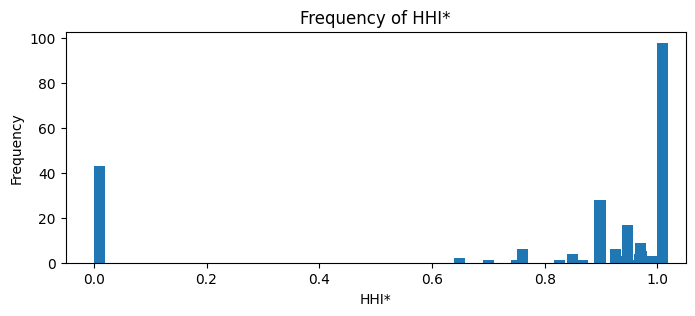

In [17]:
index.drop_duplicates(subset ="Actor",keep = "first", inplace = True)
fig, ax = plt.subplots(figsize=(8, 3))
index["HHI*_2020"].plot(kind = 'hist',align='mid',bins=1000,width=0.02)
plt.xlabel("HHI*")
plt.title(label="Frequency of HHI*",loc="center")

In [18]:
#index.loc[index['Actor'] == 'Pekin Ibrahim']
diversity = [] #create dictionary
for value in index["HHI*_2020"]:
    if value == 0:
        diversity.append("Non-diverse actors")
    else:
        diversity.append("Diverse actors")
       
index["Group"] = diversity #save dictionary into new column
index

Actor                          Film  Year     Genre  Gender  \
0          A. Galak            Abang Long Fadil 2  2017    Comedy    Male   
3        Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male   
7        Abam Bocey        Ada Apa Dekat Bus Stop  2015    Comedy    Male   
14      Achey Bocey            Abang Long Fadil 2  2017    Comedy    Male   
15      Adam Corrie                   Darah Panas  2015    Comedy    Male   
..              ...                           ...   ...       ...     ...   
830  Zamarul Hisham  Blok 404: Hidup Sampai Mati   2018  Thriller    Male   
837     Zizan Razak                     Polis Evo  2015    Action    Male   
841     Zoey Rahman              Aku Haus Darahmu  2017    Horror    Male   
844     Zul Ariffin               Misteri Dilaila  2019  Thriller    Male   
847      Zulin Aziz                        Rembat  2015    Comedy  Female   

       Races  Debut year  Career year  Total film  Total Genre  HHI*_2020  \
0      Malay        1981           39           3            2   0.888889   
3      Malay        2008           12           4            3   0.937500   
7      Malay        2014            6           5            2   0.640000   
14     Malay        2014            6           3            1   0.000000   
15   Chinese        2001           19           3            1   0.000000   
..       ...         ...          ...         ...          ...        ...   
830    Malay        2001           19           2            2   1.000000   
837    Malay        2010           10           9            3   0.851852   
841    Malay        2010           10           2            2   1.000000   
844    Malay        2010           10           5            3   0.840000   
847    Malay        2014            6           2            1   0.000000   

     HHI*_2019  HHI*_2018  HHI*_2017  HHI*_2016  HHI*_2015               Group  
0     0.888889   0.888889   0.888889       1.00        NaN      Diverse actors  
3     0.937500   0.937500   0.888889       0.00   0.000000      Diverse actors  
7     0.750000   0.750000   0.750000       0.75   0.888889      Diverse actors  
14    0.000000   0.000000   0.000000        NaN        NaN  Non-diverse actors  
15    0.000000   0.000000   0.000000       0.00   0.000000  Non-diverse actors  
..         ...        ...        ...        ...        ...                 ...  
830   1.000000   1.000000   0.000000       0.00   0.000000      Diverse actors  
837   0.796875   0.857143   0.640000       0.75   0.750000      Diverse actors  
841   1.000000   1.000000   0.000000        NaN        NaN      Diverse actors  
844   0.840000   0.888889   0.000000        NaN        NaN      Diverse actors  
847   0.000000   0.000000   0.000000       0.00   0.000000  Non-diverse actors  

[243 rows x 17 columns]

## Career Year vs Total Films (colour = diversity) 

## Find first HHI*

In [19]:
index['combined']=index['HHI*_2015'].astype(str)+','+index['HHI*_2016'].astype(str)+','+index['HHI*_2017'].astype(str)+','+index['HHI*_2018'].astype(str)+','+index['HHI*_2019'].astype(str)+','+index['HHI*_2020'].astype(str)
index['combined'] = [x.lstrip(',nan') for x in index['combined']]
new=index['combined'].str.split(',',n=2,expand=True)
# making separate first name column from new data frame
index["First HHI*"]= new[0]
# Dropping old Name columns
index.drop(columns =["combined"], inplace = True)
index['First HHI*']=pd.to_numeric(index['First HHI*'])
index['First HHI*']=index['First HHI*'].round(decimals = 4)
index

Actor                          Film  Year     Genre  Gender  \
0          A. Galak            Abang Long Fadil 2  2017    Comedy    Male   
3        Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male   
7        Abam Bocey        Ada Apa Dekat Bus Stop  2015    Comedy    Male   
14      Achey Bocey            Abang Long Fadil 2  2017    Comedy    Male   
15      Adam Corrie                   Darah Panas  2015    Comedy    Male   
..              ...                           ...   ...       ...     ...   
830  Zamarul Hisham  Blok 404: Hidup Sampai Mati   2018  Thriller    Male   
837     Zizan Razak                     Polis Evo  2015    Action    Male   
841     Zoey Rahman              Aku Haus Darahmu  2017    Horror    Male   
844     Zul Ariffin               Misteri Dilaila  2019  Thriller    Male   
847      Zulin Aziz                        Rembat  2015    Comedy  Female   

       Races  Debut year  Career year  Total film  Total Genre  HHI*_2020  \
0      Malay        1981           39           3            2   0.888889   
3      Malay        2008           12           4            3   0.937500   
7      Malay        2014            6           5            2   0.640000   
14     Malay        2014            6           3            1   0.000000   
15   Chinese        2001           19           3            1   0.000000   
..       ...         ...          ...         ...          ...        ...   
830    Malay        2001           19           2            2   1.000000   
837    Malay        2010           10           9            3   0.851852   
841    Malay        2010           10           2            2   1.000000   
844    Malay        2010           10           5            3   0.840000   
847    Malay        2014            6           2            1   0.000000   

     HHI*_2019  HHI*_2018  HHI*_2017  HHI*_2016  HHI*_2015  \
0     0.888889   0.888889   0.888889       1.00        NaN   
3     0.937500   0.937500   0.888889       0.00   0.000000   
7     0.750000   0.750000   0.750000       0.75   0.888889   
14    0.000000   0.000000   0.000000        NaN        NaN   
15    0.000000   0.000000   0.000000       0.00   0.000000   
..         ...        ...        ...        ...        ...   
830   1.000000   1.000000   0.000000       0.00   0.000000   
837   0.796875   0.857143   0.640000       0.75   0.750000   
841   1.000000   1.000000   0.000000        NaN        NaN   
844   0.840000   0.888889   0.000000        NaN        NaN   
847   0.000000   0.000000   0.000000       0.00   0.000000   

                  Group  First HHI*  
0        Diverse actors      1.0000  
3        Diverse actors      0.0000  
7        Diverse actors      0.8889  
14   Non-diverse actors      0.0000  
15   Non-diverse actors      0.0000  
..                  ...         ...  
830      Diverse actors      0.0000  
837      Diverse actors      0.7500  
841      Diverse actors      0.0000  
844      Diverse actors      0.0000  
847  Non-diverse actors      0.0000  

[243 rows x 18 columns]

## First HHI* vs Final HHI*

In [20]:
m1= index['First HHI*'].astype(float) > index['HHI*_2020']
m2= index['First HHI*'].astype(float) < index['HHI*_2020']
#m3= k['First value'].astype(float) == k['HHI*_2020']

index['Group Changes'] = np.select([m1, m2],
                    [ 'Changed', 'Changed'], 
                    default='Unchanged')

In [21]:
chan = index[index['Group Changes']=='Changed']
uchan = index[index['Group Changes']=='Unchanged']

In [22]:
u=uchan.groupby(['HHI*_2020', 'Total film'])
u

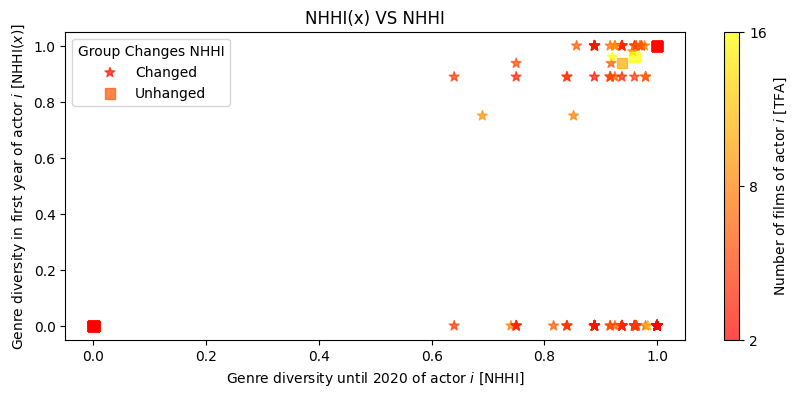

In [74]:
fig = plt.figure(figsize=(10, 4))

plt.scatter(
    x=chan['HHI*_2020'],
    y=chan['First HHI*'],
    s=55,
    c=chan['Total film'],
    cmap="autumn",
    marker='*',
    alpha=0.7,
    label='Changed'
    )
plt.scatter(
    x=uchan['HHI*_2020'],
    y=uchan['First HHI*'],
    s=55,
    c=uchan['Total film'],
    cmap="autumn",
    marker='s',
    alpha=0.7,
    label='Unhanged'
    )

plt.title("NHHI(x) VS NHHI")
plt.xlabel("Genre diversity until 2020 of actor $\t{i}$ [NHHI]")
plt.ylabel("Genre diversity in first year of actor $\t{i}$ [NHHI($\t{x}$)]")

# Add colorbar, make sure to specify tick locations to match desired ticklabels
clb=plt.colorbar(ticks=[2,3.5,5])
clb.ax.set_yticklabels(['2', '8','16'])  # vertically oriented colorbar
clb.ax.set_ylabel('Number of films of actor $\t{i}$ [TFA]')
plt.legend(title="Group Changes NHHI",loc="upper left")
plt.savefig('Figure 7.jpg',dpi=500,bbox_inches = 'tight')
plt.show()
#index.to_csv('Example1.csv', index=False) #save to new file

## Actor network 

### Generated nodes and weighted edges from data 

In [24]:
nod= index.loc[:,['Actor','Total film','Career year','Gender','Races','Debut year','HHI*_2020','Total Genre','Group']]
nod.to_csv('Actor_nodes.csv', index=False) #save to new file

In [25]:
edges = pd.read_csv('Filmandactor_1.csv') #read csv file

def get_combinations(group):
    return pd.DataFrame([sorted(e) for e in list(combinations(group['Actor'].values, 2))], columns=['from', 'to'])

edges = edges.groupby('Film').apply(get_combinations) #get all 2-combinations of names within each group
edges = edges.groupby(['from', 'to']).size().to_frame('weight').reset_index() #group by the node names to obtain the weight
edges.to_csv('Actor_edges.csv', index=False) #save into different file
edges.head()

from                       to  weight
0  A. Galak              Achey Bocey       1
1  A. Galak            Along Eyzendy       1
2  A. Galak  Dato' Jalaluddin Hassan       1
3  A. Galak       Dato' Rahim Razali       1
4  A. Galak              Fizz Fairuz       1

### Create network

In [26]:
G=nx.Graph() #create blank network

In [27]:
with open('Actor_edges.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

G.add_weighted_edges_from(edges) #add weighted edges into network

In [28]:
with open('Actor_nodes.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    nodes = [n for n in nodereader][1:]# Retrieve the data 

node_names = [n[0] for n in nodes] # Get a list of only the node names
G.add_nodes_from(node_names) #add nodes into network

In [29]:
#set node attribute
#Create blank dictionary
total_dict = {}
career_dict = {}
gender_dict = {}
races_dict = {}
debut_dict = {}
hhi_dict = {}
genre_dict = {}
group_dict = {}

#Loop through the list, one row at a time
for node in nodes: 
    total_dict[node[0]] = node[1]
    career_dict[node[0]] = node[2]
    gender_dict[node[0]] = node[3]
    races_dict[node[0]] = node[4]
    debut_dict[node[0]] = node[5]
    hhi_dict[node[0]] = node[6]
    genre_dict[node[0]] = node[7]
    group_dict[node[0]] = node[8]
    
#set nodes attribute in network
nx.set_node_attributes(G, total_dict, 'Total_Film')
nx.set_node_attributes(G, career_dict, 'Career')
nx.set_node_attributes(G, gender_dict, 'Gender')
nx.set_node_attributes(G, races_dict, 'Races')
nx.set_node_attributes(G, debut_dict, 'Debut_Year')
nx.set_node_attributes(G, hhi_dict, 'HHI*')
nx.set_node_attributes(G, genre_dict, 'Genre')
nx.set_node_attributes(G, group_dict, 'Group')

### Network Information 

In [30]:
density = nx.density(G) #calculate network density
print("Network density:", density)
print(nx.info(G))

Network density: 0.061966466006870044
Name: 
Type: Graph
Number of nodes: 243
Number of edges: 1822
Average degree:  14.9959


In [31]:
# If the Graph has more than one component, this will return False:
print("Network is connected:",nx.is_connected(G))
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)
print("Triadic closure:", nx.transitivity(G))#transitivity
print ("Average shortest path:", nx.average_shortest_path_length(subgraph))
print ("Average clustering:", nx.average_clustering(G))

Network is connected: True
Network diameter of largest component: 6
Triadic closure: 0.2997312992979111
Average shortest path: 2.47984899500051
Average clustering: 0.44530009899131506


In [32]:
#G(N,<k>,p)=G(243,15,15/242)
random=nx.watts_strogatz_graph(243,15,15/242)

In [33]:
def random_networks_generator(N, k, p, num_networks=1, directed=False):
    Graph_list = []
    densities = []
    trans = []
    clusterings = []
    avgpath = []
    for _ in range(num_networks):
        G = nx.watts_strogatz_graph(N,k,p)
        D = nx.density(G)
        T = nx.transitivity(G)
        APL = nx.average_shortest_path_length(G)
        C = nx.average_clustering(G)
        Graph_list.append(G)
        densities.append(D)
        trans.append(T)
        avgpath.append(APL)
        clusterings.append(C)
    return densities, trans, avgpath, clusterings 

results = random_networks_generator(243, 15, 15/242, 1000, directed=False)
for x in results:
    #print("10 list:",x)
    print("Average 1000 iteration:",sum(x)/len(x))


Average 1000 iteration: 0.05785123966941993
Average 1000 iteration: 0.5729407232321523
Average 1000 iteration: 3.089228378056657
Average 1000 iteration: 0.5775486116824704


In [34]:
print("Network density:", nx.density(random))
print(nx.info(random))
print("Triadic closure:", nx.transitivity(random))#transitivity
print ("Average shortest path:", nx.average_shortest_path_length(random))
print ("Average clustering:", nx.average_clustering(random))

Network density: 0.05785123966942149
Name: 
Type: Graph
Number of nodes: 243
Number of edges: 1701
Average degree:  14.0000
Triadic closure: 0.5493604755899838
Average shortest path: 3.0209842533074855
Average clustering: 0.5534173604979705


In [35]:
#G(N,p)=G(243,15/242)
random_renyi=nx.erdos_renyi_graph(243,15/242)
print("Network density:", nx.density(random_renyi))
print(nx.info(random_renyi))
print("Triadic closure:", nx.transitivity(random_renyi))#transitivity
print ("Average shortest path:", nx.average_shortest_path_length(random_renyi))
print ("Average clustering:", nx.average_clustering(random_renyi))

Network density: 0.062340577492092646
Name: 
Type: Graph
Number of nodes: 243
Number of edges: 1833
Average degree:  15.0864
Triadic closure: 0.06122890523582865
Average shortest path: 2.304152637485971
Average clustering: 0.06127896515738173


## Degree Distribution

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of nodes')

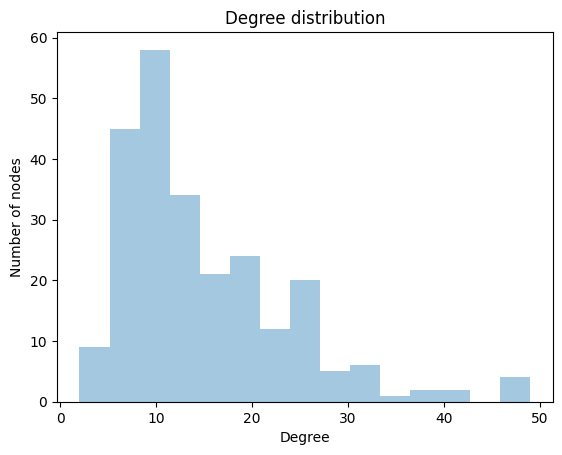

In [36]:
# Degree Distribution
degrees = pd.DataFrame(G.degree(), columns=['Node','Degree'])
sns.distplot(a=degrees['Degree'],kde=False)
plt.title('Degree distribution')
plt.ylabel('Number of nodes')

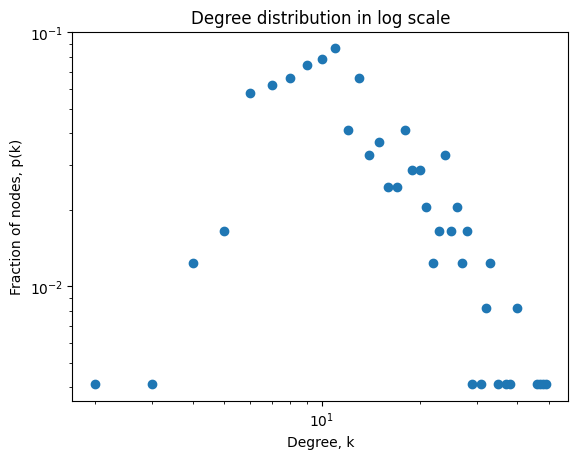

In [37]:
#Degree distribution in log scale
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
plt.figure()
plt.plot(degree_values, histogram, 'o')
plt.title('Degree distribution in log scale')
plt.xlabel('Degree, k')
plt.ylabel('Fraction of nodes, p(k)')
plt.xscale('log')
plt.yscale('log')
plt.show()

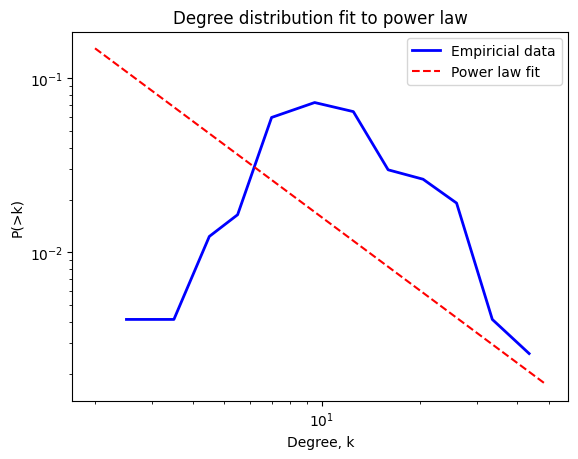

In [38]:
#Fit power law
import powerlaw
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # used for degree distribution and powerlaw test
#Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence,xmin=1) 
fig2 = fit.plot_pdf(color='blue', linewidth=2, label='Empiricial data')
fit.power_law.plot_pdf(ax=fig2,color='red', linestyle='--', label='Power law fit') #powerlaw
plt.ylabel('P(>k)')
plt.xlabel('Degree, k')
plt.title('Degree distribution fit to power law')
plt.legend()

### Draw network with networkx

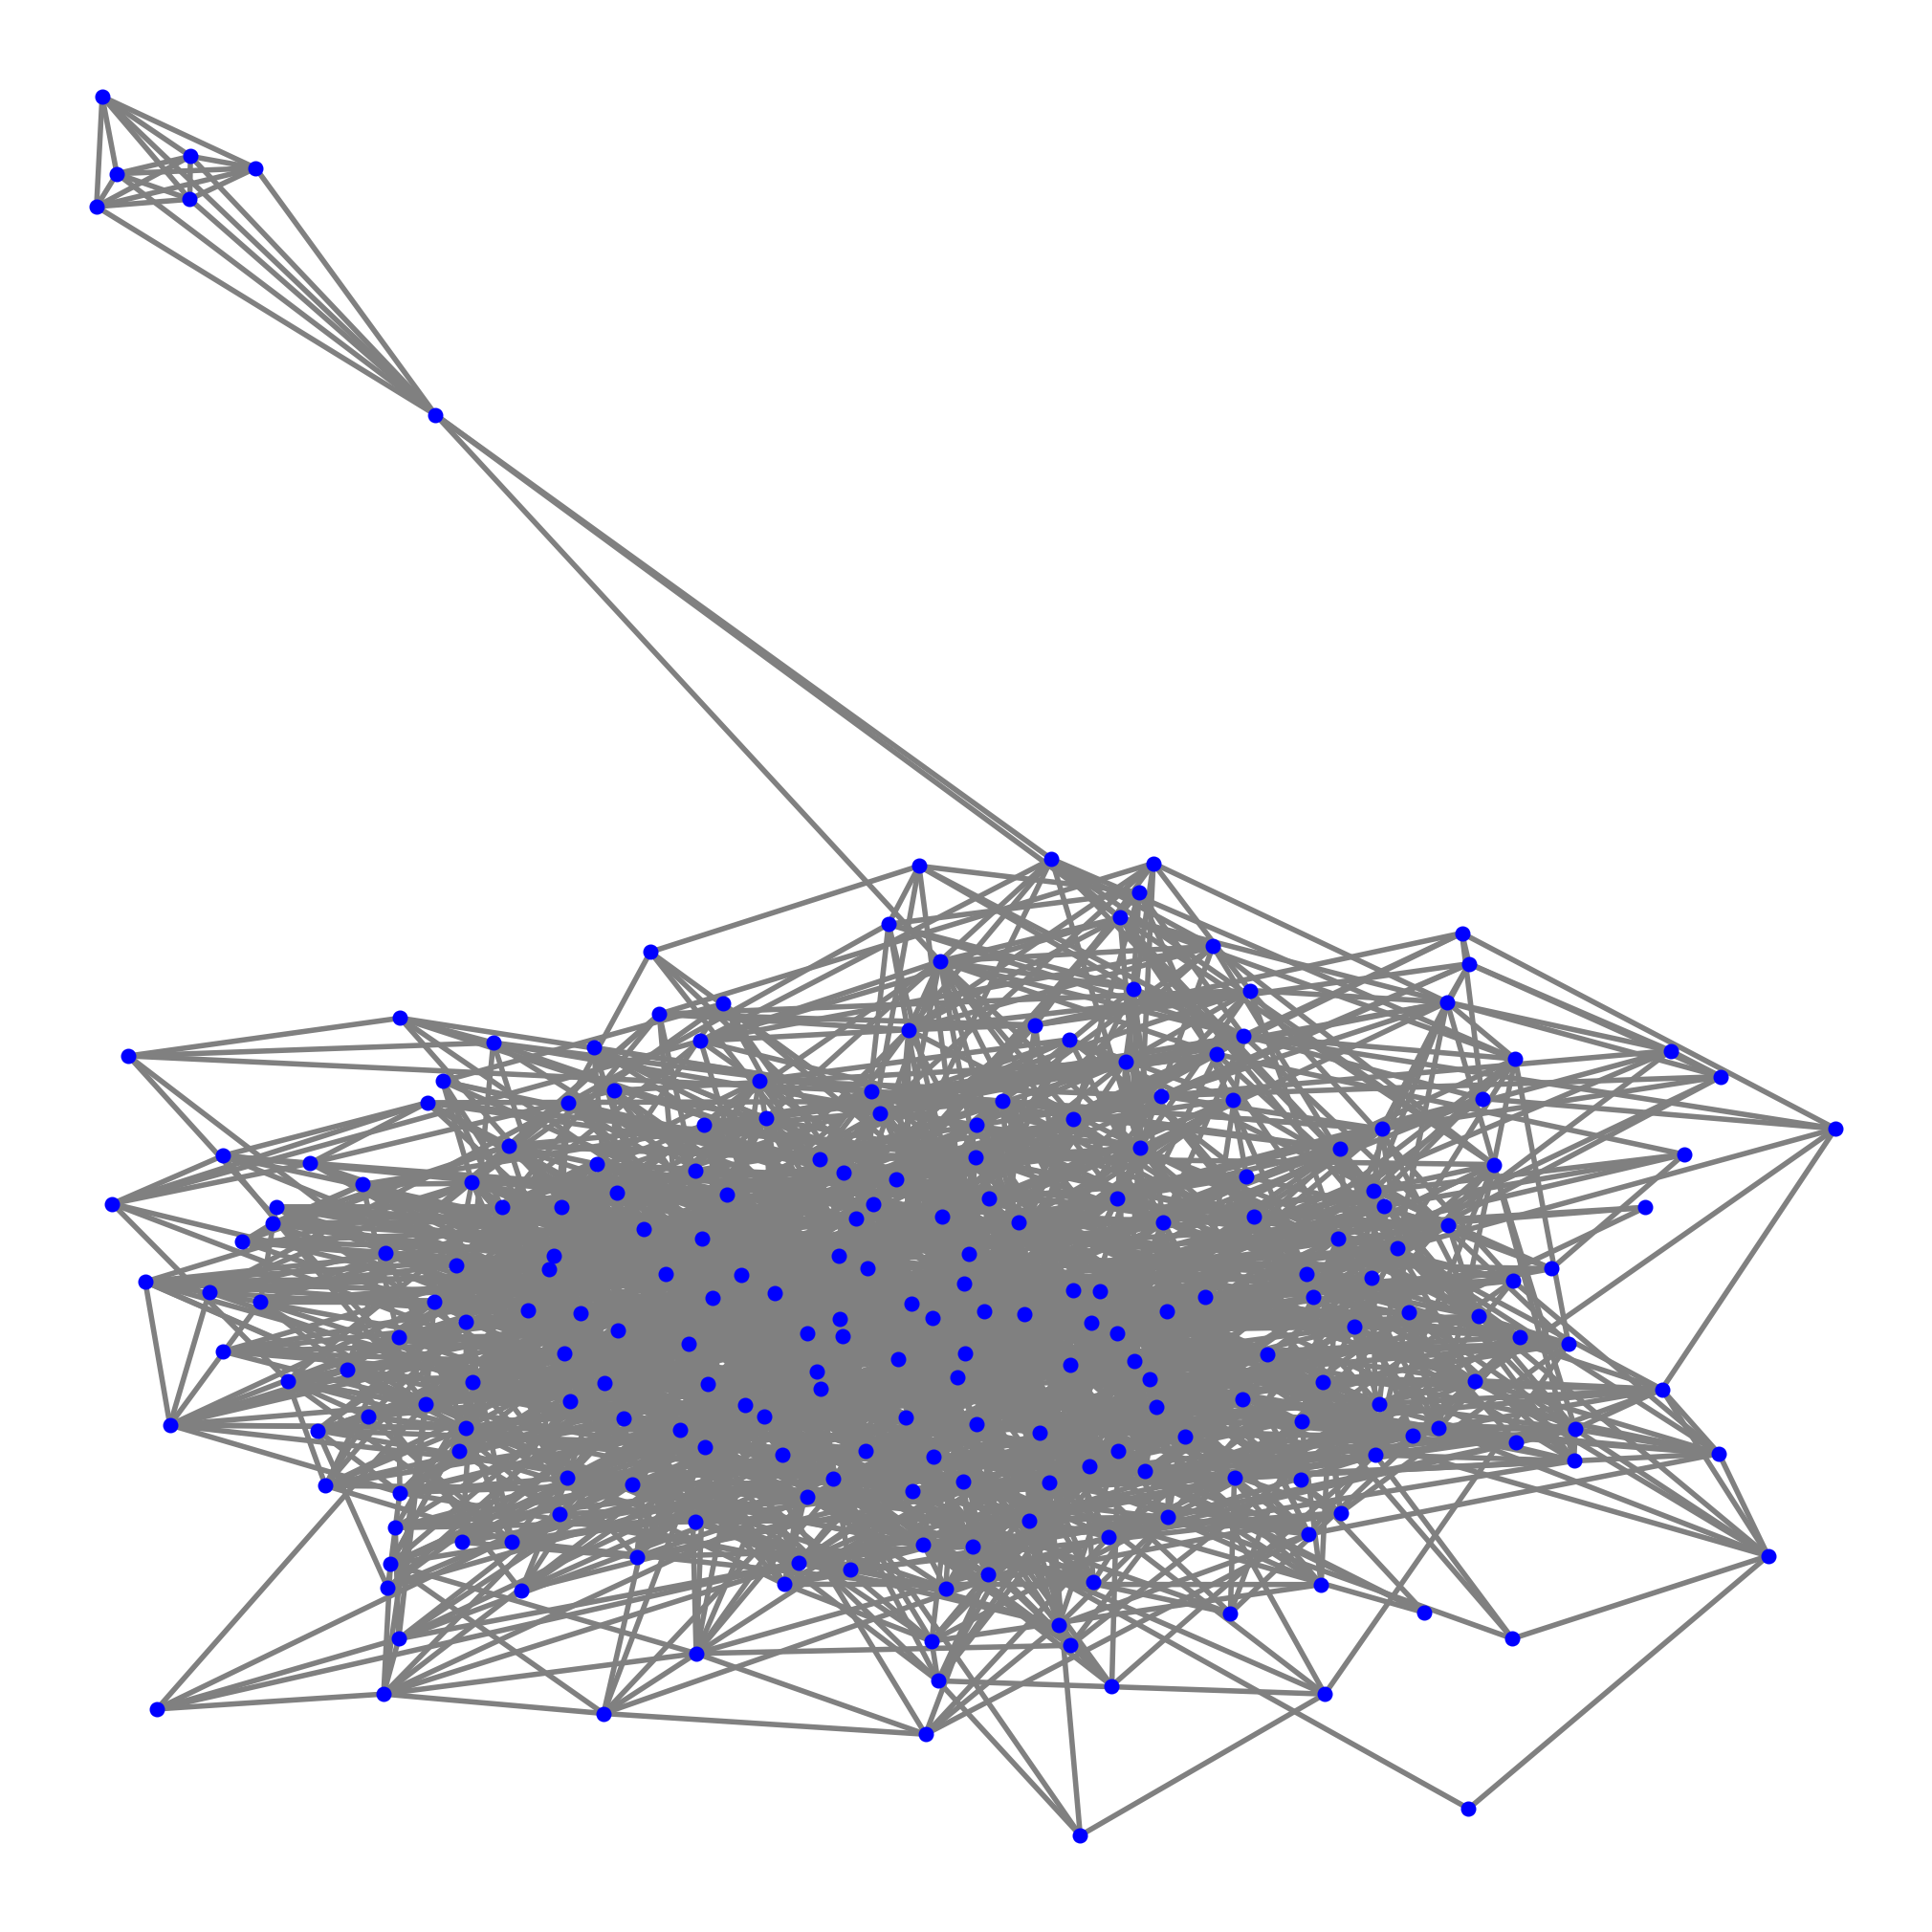

In [39]:
pos=nx.spring_layout(G,scale=2) #spring layout
plt.figure(figsize =(20, 20)) #figure size
nx.draw(G,pos,
            with_labels=False,
            node_size=100, 
            node_color="blue", 
            node_shape="o",
            font_size=8,
            font_color="black",
            linewidths=1.5,
            width=4,
            edge_color="grey",)

## Calculate centralities

In [40]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
closeness_dict = nx.closeness_centrality(G) # Run closeness centrality
degree_dict = nx.degree_centrality(G) # Run degree centrality
ndegree_dict = {n: d for n, d in G.degree()} # Run degree

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
nx.set_node_attributes(G, closeness_dict, 'closeness')
nx.set_node_attributes(G, degree_dict, 'degree')
nx.set_node_attributes(G, ndegree_dict, 'ndegree')

## Average shortest path for every actor

In [41]:
def shortest_path(G):
    shortestpl_dict = {}
    for node in G.nodes():
        shortestpl_dict[node] = np.average(
            list(nx.shortest_path_length(G, weight=None, source=node).values()))
    return shortestpl_dict

In [42]:
avg_dict = shortest_path(subgraph)
nx.set_node_attributes(G, avg_dict, 'avg')

In [43]:
att = pd.DataFrame([i[1] for i in G.nodes(data=True)], index=[i[0] for i in G.nodes(data=True)])
#att = att.astype({'Total_Film':'float64', 'Year_Career':'float64', 'Debut_Year':'float64', 'HHI*':'float64'})
att.to_csv('Actor_centralities.csv', index=True) #save to new file
att = pd.read_csv('Actor_centralities.csv')
att = att.rename(columns={att.columns[0]: 'Actor'})
att.head()

Actor  Total_Film  Career Gender  Races  Debut_Year  \
0                 A. Galak           3      39   Male  Malay        1981   
1              Achey Bocey           3       6   Male  Malay        2014   
2            Along Eyzendy           6      17   Male  Malay        2003   
3  Dato' Jalaluddin Hassan           9      26   Male  Malay        1994   
4       Dato' Rahim Razali           4      42   Male  Malay        1978   

       HHI*  Genre               Group  betweenness  eigenvector  closeness  \
0  0.888889      2      Diverse actors     0.001703     0.042753   0.416523   
1  0.000000      1  Non-diverse actors     0.002892     0.044936   0.415094   
2  0.750000      3      Diverse actors     0.015891     0.089937   0.460952   
3  0.977778      6      Diverse actors     0.040544     0.136918   0.501035   
4  0.937500      3      Diverse actors     0.007555     0.066992   0.444853   

     degree  ndegree       avg  
0  0.045455       11  2.390947  
1  0.057851       14  2.399177  
2  0.107438       26  2.160494  
3  0.165289       40  1.987654  
4  0.082645       20  2.238683

## Description of attributes

In [44]:
describe = att.describe()
print(describe)

       Total_Film      Career   Debut_Year        HHI*       Genre  \
count  243.000000  243.000000   243.000000  243.000000  243.000000   
mean     3.493827   13.613169  2006.386831    0.781347    2.370370   
std      2.045698   10.541464    10.541464    0.368754    1.041825   
min      2.000000    0.000000  1963.000000    0.000000    1.000000   
25%      2.000000    6.000000  2002.000000    0.873016    2.000000   
50%      3.000000   10.000000  2010.000000    0.960000    2.000000   
75%      4.000000   18.000000  2014.000000    1.000000    3.000000   
max     16.000000   57.000000  2020.000000    1.000000    7.000000   

       betweenness  eigenvector   closeness      degree     ndegree  \
count   243.000000   243.000000  243.000000  243.000000  243.000000   
mean      0.006140     0.052858    0.409372    0.061966   14.995885   
std       0.009155     0.036425    0.046451    0.035856    8.677175   
min       0.000000     0.000393    0.243216    0.008264    2.000000   
25%       0.00

## Top 10 Average shortest path

In [45]:
lowest_avg_shortest_path = att.sort_values(by="avg",ascending=True)
lowest_avg_shortest_path.head(10)

Actor  Total_Film  Career  Gender  Races  Debut_Year  \
79             Pekin Ibrahim          16      16    Male  Malay        2004   
29               Soffi Jikan          10      19    Male  Malay        2001   
127                   Namron          12      20    Male  Malay        2000   
168               Remy Ishak          10      13    Male  Malay        2007   
156           Faizal Hussein           8      48    Male  Malay        1972   
48               Nora Danish           9      15  Female  Malay        2005   
3    Dato' Jalaluddin Hassan           9      26    Male  Malay        1994   
44           Kamarool Yusoff           9      35    Male  Malay        1985   
40               Farid Kamil           7      17    Male  Malay        2003   
81               Saiful Apek           6      22    Male  Malay        1998   

         HHI*  Genre           Group  betweenness  eigenvector  closeness  \
79   0.920573      7  Diverse actors     0.046454     0.186132   0.522678   
29   0.690000      3  Diverse actors     0.043773     0.183816   0.514894   
127  0.983333      6  Diverse actors     0.043222     0.197816   0.512712   
168  0.925000      5  Diverse actors     0.051274     0.162588   0.509474   
156  0.916667      4  Diverse actors     0.031150     0.156763   0.508403   
48   0.956790      5  Diverse actors     0.030708     0.152617   0.503119   
3    0.977778      6  Diverse actors     0.040544     0.136918   0.501035   
44   0.740741      3  Diverse actors     0.027701     0.119724   0.496920   
40   0.979592      3  Diverse actors     0.032490     0.136164   0.495902   
81   0.888889      4  Diverse actors     0.028463     0.139643   0.494888   

       degree  ndegree       avg  
79   0.198347       48  1.905350  
29   0.194215       47  1.934156  
127  0.202479       49  1.942387  
168  0.190083       46  1.954733  
156  0.157025       38  1.958848  
48   0.165289       40  1.979424  
3    0.165289       40  1.987654  
44   0.136364       33  2.004115  
40   0.144628       35  2.008230  
81   0.152893       37  2.012346

## Candidate for Kevin Bacon

In [46]:
candidate = [] #create dictionary
for value in att["avg"]:
    if value < 2:
        candidate.append("Candidate")
    else:
        candidate.append("Actors")
       
att["candidate"] = candidate #save dictionary into new column
att

Actor  Total_Film  Career  Gender   Races  Debut_Year  \
0                   A. Galak           3      39    Male   Malay        1981   
1                Achey Bocey           3       6    Male   Malay        2014   
2              Along Eyzendy           6      17    Male   Malay        2003   
3    Dato' Jalaluddin Hassan           9      26    Male   Malay        1994   
4         Dato' Rahim Razali           4      42    Male   Malay        1978   
..                       ...         ...     ...     ...     ...         ...   
238             Harith Haziq           2       4    Male   Malay        2016   
239              June Lojong           2       4  Female   Malay        2016   
240            Nadiah M. Din           2       8  Female   Malay        2012   
241                 Kay Shan           2       5    Male   Malay        2015   
242     Sangeeta Krishnasamy           2      11  Female  Indian        2009   

         HHI*  Genre               Group  betweenness  eigenvector  closeness  \
0    0.888889      2      Diverse actors     0.001703     0.042753   0.416523   
1    0.000000      1  Non-diverse actors     0.002892     0.044936   0.415094   
2    0.750000      3      Diverse actors     0.015891     0.089937   0.460952   
3    0.977778      6      Diverse actors     0.040544     0.136918   0.501035   
4    0.937500      3      Diverse actors     0.007555     0.066992   0.444853   
..        ...    ...                 ...          ...          ...        ...   
238  1.000000      2      Diverse actors     0.000132     0.037723   0.392857   
239  1.000000      2      Diverse actors     0.000132     0.037723   0.392857   
240  1.000000      2      Diverse actors     0.000307     0.051662   0.401327   
241  1.000000      2      Diverse actors     0.000298     0.004231   0.322237   
242  0.000000      1  Non-diverse actors     0.000057     0.015547   0.354319   

       degree  ndegree       avg  candidate  
0    0.045455       11  2.390947     Actors  
1    0.057851       14  2.399177     Actors  
2    0.107438       26  2.160494     Actors  
3    0.165289       40  1.987654  Candidate  
4    0.082645       20  2.238683     Actors  
..        ...      ...       ...        ...  
238  0.033058        8  2.534979     Actors  
239  0.033058        8  2.534979     Actors  
240  0.041322       10  2.481481     Actors  
241  0.008264        2  3.090535     Actors  
242  0.020661        5  2.810700     Actors  

[243 rows x 16 columns]

## Top 10 Degree centrality

In [47]:
val=att.sort_values(by="degree",ascending=False)
print("Mean: ", val["degree"].mean())
val.head(10)

Mean:  0.061966466006869995


Actor  Total_Film  Career  Gender  Races  Debut_Year  \
127                   Namron          12      20    Male  Malay        2000   
79             Pekin Ibrahim          16      16    Male  Malay        2004   
29               Soffi Jikan          10      19    Male  Malay        2001   
168               Remy Ishak          10      13    Male  Malay        2007   
3    Dato' Jalaluddin Hassan           9      26    Male  Malay        1994   
48               Nora Danish           9      15  Female  Malay        2005   
156           Faizal Hussein           8      48    Male  Malay        1972   
81               Saiful Apek           6      22    Male  Malay        1998   
40               Farid Kamil           7      17    Male  Malay        2003   
44           Kamarool Yusoff           9      35    Male  Malay        1985   

         HHI*  Genre           Group  betweenness  eigenvector  closeness  \
127  0.983333      6  Diverse actors     0.043222     0.197816   0.512712   
79   0.920573      7  Diverse actors     0.046454     0.186132   0.522678   
29   0.690000      3  Diverse actors     0.043773     0.183816   0.514894   
168  0.925000      5  Diverse actors     0.051274     0.162588   0.509474   
3    0.977778      6  Diverse actors     0.040544     0.136918   0.501035   
48   0.956790      5  Diverse actors     0.030708     0.152617   0.503119   
156  0.916667      4  Diverse actors     0.031150     0.156763   0.508403   
81   0.888889      4  Diverse actors     0.028463     0.139643   0.494888   
40   0.979592      3  Diverse actors     0.032490     0.136164   0.495902   
44   0.740741      3  Diverse actors     0.027701     0.119724   0.496920   

       degree  ndegree       avg  candidate  
127  0.202479       49  1.942387  Candidate  
79   0.198347       48  1.905350  Candidate  
29   0.194215       47  1.934156  Candidate  
168  0.190083       46  1.954733  Candidate  
3    0.165289       40  1.987654  Candidate  
48   0.165289       40  1.979424  Candidate  
156  0.157025       38  1.958848  Candidate  
81   0.152893       37  2.012346     Actors  
40   0.144628       35  2.008230     Actors  
44   0.136364       33  2.004115     Actors

## Top 10 Betweenness Centrality

In [48]:
val1=att.sort_values(by="betweenness",ascending=False)
print("Mean: ", val1["betweenness"].mean())
val1.head(10)

Mean:  0.006140452261412861


Actor  Total_Film  Career  Gender  Races  Debut_Year  \
168               Remy Ishak          10      13    Male  Malay        2007   
109         Nur Fathiah Diaz           3      11  Female  Malay        2009   
79             Pekin Ibrahim          16      16    Male  Malay        2004   
105             Fadlan Hazim           4       6    Male  Malay        2014   
29               Soffi Jikan          10      19    Male  Malay        2001   
127                   Namron          12      20    Male  Malay        2000   
3    Dato' Jalaluddin Hassan           9      26    Male  Malay        1994   
40               Farid Kamil           7      17    Male  Malay        2003   
156           Faizal Hussein           8      48    Male  Malay        1972   
46               Kazar Saisi           8      13    Male  Malay        2007   

         HHI*  Genre           Group  betweenness  eigenvector  closeness  \
168  0.925000      5  Diverse actors     0.051274     0.162588   0.509474   
109  0.888889      2  Diverse actors     0.048558     0.006161   0.318841   
79   0.920573      7  Diverse actors     0.046454     0.186132   0.522678   
105  0.937500      3  Diverse actors     0.044052     0.061118   0.441606   
29   0.690000      3  Diverse actors     0.043773     0.183816   0.514894   
127  0.983333      6  Diverse actors     0.043222     0.197816   0.512712   
3    0.977778      6  Diverse actors     0.040544     0.136918   0.501035   
40   0.979592      3  Diverse actors     0.032490     0.136164   0.495902   
156  0.916667      4  Diverse actors     0.031150     0.156763   0.508403   
46   0.750000      2  Diverse actors     0.030831     0.102619   0.482072   

       degree  ndegree       avg  candidate  
168  0.190083       46  1.954733  Candidate  
109  0.037190        9  3.123457     Actors  
79   0.198347       48  1.905350  Candidate  
105  0.078512       19  2.255144     Actors  
29   0.194215       47  1.934156  Candidate  
127  0.202479       49  1.942387  Candidate  
3    0.165289       40  1.987654  Candidate  
40   0.144628       35  2.008230     Actors  
156  0.157025       38  1.958848  Candidate  
46   0.136364       33  2.065844     Actors

## Plot TFA vs average shortest path and centralities

In [49]:
cand = att[att['candidate']=='Candidate']
ucand = att[att['candidate']=='Actors']

In [50]:
#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results= ssreg / sstot

    return results

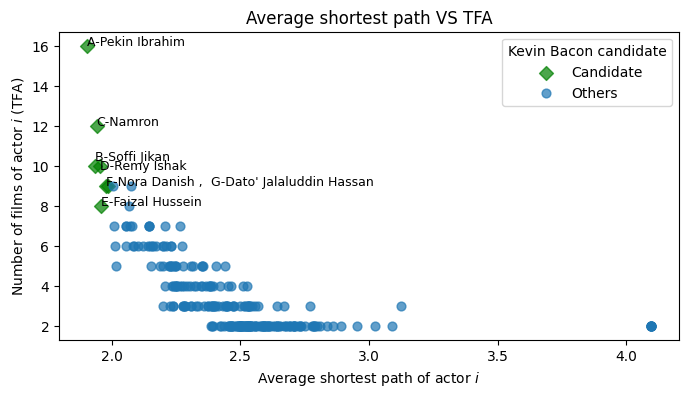

In [66]:
fig = plt.figure(figsize=(8, 4))

plt.scatter(
    x=cand['avg'],
    y=cand['Total_Film'],
    s=50,
    c="green",
    marker='D',
    alpha=0.7,
    label='Candidate'
    )
plt.scatter(
    x=ucand['avg'],
    y=ucand['Total_Film'],
    s=40,
    cmap="blue",
    marker='o',
    alpha=0.7,
    label='Others'
    )

plt.text(cand.avg[cand.Actor=='Pekin Ibrahim'],cand.Total_Film[cand.Actor=='Pekin Ibrahim'],"A-Pekin Ibrahim", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.avg[cand.Actor=='Soffi Jikan'],cand.Total_Film[cand.Actor=='Soffi Jikan']+0.25,"B-Soffi Jikan", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.avg[cand.Actor=='Namron'],cand.Total_Film[cand.Actor=='Namron'],"C-Namron", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.avg[cand.Actor=='Remy Ishak'],cand.Total_Film[cand.Actor=='Remy Ishak']-0.2,"D-Remy Ishak", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.avg[cand.Actor=='Faizal Hussein'],cand.Total_Film[cand.Actor=='Faizal Hussein'],"E-Faizal Hussein", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.avg[cand.Actor=='Nora Danish'],cand.Total_Film[cand.Actor=='Nora Danish'],"F-Nora Danish ,", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.avg[cand.Actor=="Dato' Jalaluddin Hassan"]+0.4,cand.Total_Film[att.Actor=="Dato' Jalaluddin Hassan"],"G-Dato' Jalaluddin Hassan", 
 fontdict=dict(color='black', alpha=1, size=9))

plt.xlabel("Average shortest path of actor $\t{i}$")
plt.ylabel("Number of films of actor $\t{i}$ (TFA)")
plt.title(label="Average shortest path VS TFA",loc="center")

plt.legend(title="Kevin Bacon candidate",loc="upper right")
plt.savefig('Figure 1.jpg',dpi=500,bbox_inches = 'tight')
plt.show()

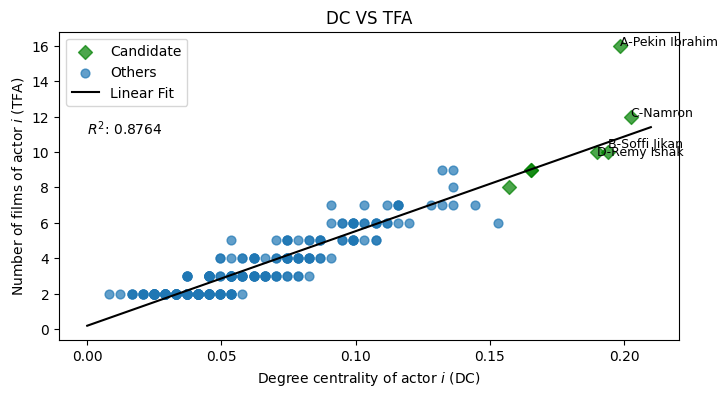

In [67]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(
    x=cand['degree'],
    y=cand['Total_Film'],
    s=50,
    c="green",
    marker='D',
    alpha=0.7,
    label='Candidate'
    )
plt.scatter(
    x=ucand['degree'],
    y=ucand['Total_Film'],
    s=40,
    cmap="blue",
    marker='o',
    alpha=0.7,
    label='Others'
    )
plt.xlabel("Degree centrality of actor $\t{i}$ (DC) ")
plt.ylabel("Number of films of actor $\t{i}$ (TFA)")
plt.title(label="DC VS TFA",loc="center")

plt.text(cand.degree[cand.Actor=='Pekin Ibrahim'],cand.Total_Film[att.Actor=='Pekin Ibrahim'],"A-Pekin Ibrahim", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.degree[cand.Actor=='Soffi Jikan'],cand.Total_Film[att.Actor=='Soffi Jikan']+0.25,"B-Soffi Jikan", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.degree[cand.Actor=='Namron'],cand.Total_Film[att.Actor=='Namron'],"C-Namron", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.degree[cand.Actor=='Remy Ishak'],cand.Total_Film[att.Actor=='Remy Ishak']-0.2,"D-Remy Ishak", 
 fontdict=dict(color='black', alpha=1, size=9))

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(att['degree'], att['Total_Film'], deg=1)
# Create sequence of 100 numbers from 0 to 0.21 
xseq = np.linspace(0, 0.21, num=100)
r='%.4f' %polyfit(att['degree'], att['Total_Film'], 1)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="k",  lw=1.5, label="Linear Fit")
ax.text(0, 11, '$R^2$: '+r, fontsize = 10)

# plot the legend
plt.legend(loc="upper left")
plt.savefig('Figure 3.jpg',dpi=500,bbox_inches = 'tight')
plt.show()

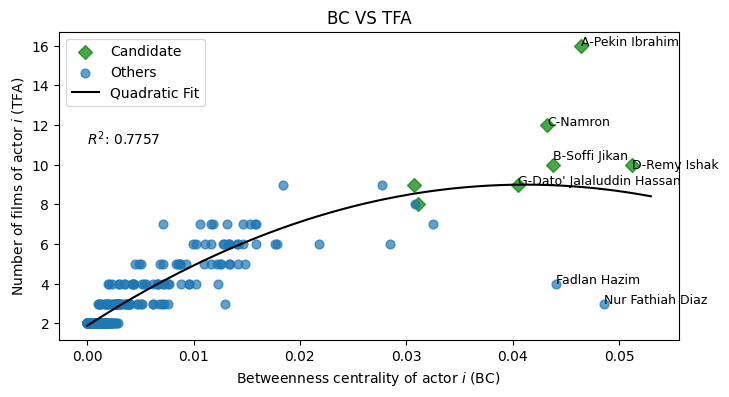

In [68]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(
    x=cand['betweenness'],
    y=cand['Total_Film'],
    s=50,
    c="green",
    marker='D',
    alpha=0.7,
    label='Candidate'
    )
plt.scatter(
    x=ucand['betweenness'],
    y=ucand['Total_Film'],
    s=40,
    cmap="blue",
    marker='o',
    alpha=0.7,
    label='Others'
    )
plt.xlabel("Betweenness centrality of actor $\t{i}$ (BC) ")
plt.ylabel("Number of films of actor $\t{i}$ (TFA)")
plt.title(label="BC VS TFA",loc="center")

plt.text(cand.betweenness[cand.Actor=='Pekin Ibrahim'],cand.Total_Film[cand.Actor=='Pekin Ibrahim'],"A-Pekin Ibrahim", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.betweenness[cand.Actor=='Soffi Jikan'],cand.Total_Film[cand.Actor=='Soffi Jikan']+0.25,"B-Soffi Jikan", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.betweenness[cand.Actor=='Namron'],cand.Total_Film[cand.Actor=='Namron'],"C-Namron", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.betweenness[cand.Actor=='Remy Ishak'],cand.Total_Film[cand.Actor=='Remy Ishak']-0.2,"D-Remy Ishak", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(cand.betweenness[cand.Actor=="Dato' Jalaluddin Hassan"],cand.Total_Film[cand.Actor=="Dato' Jalaluddin Hassan"],"G-Dato' Jalaluddin Hassan", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(ucand.betweenness[ucand.Actor=='Nur Fathiah Diaz'],ucand.Total_Film[ucand.Actor=='Nur Fathiah Diaz'],"Nur Fathiah Diaz", 
 fontdict=dict(color='black', alpha=1, size=9))
plt.text(ucand.betweenness[ucand.Actor=='Fadlan Hazim'],ucand.Total_Film[ucand.Actor=='Fadlan Hazim'],"Fadlan Hazim", 
 fontdict=dict(color='black', alpha=1, size=9))

#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(att['betweenness'], att['Total_Film'], 2))
#add fitted polynomial line to scatterplot
polyline = np.linspace(0, 0.053, 50)
ax.plot(polyline, model(polyline), color="k",label="Quadratic Fit")
r='%.4f' %polyfit(att['betweenness'], att['Total_Film'], 2)
ax.text(0, 11, '$R^2$: '+r, fontsize = 10)

# plot the legend
plt.legend(loc="upper left")
plt.savefig('Figure 5.jpg',dpi=500,bbox_inches = 'tight')
plt.show()

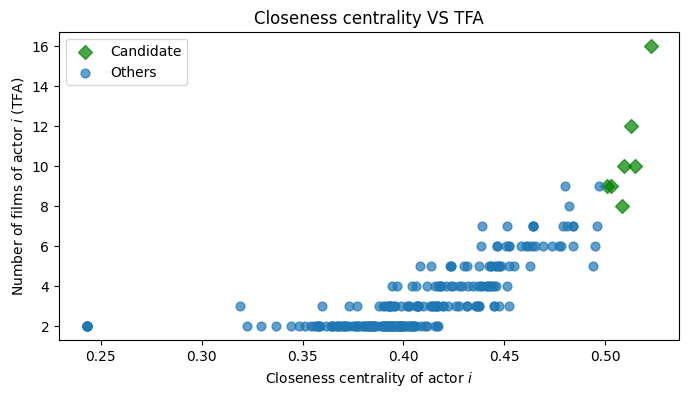

In [78]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(
    x=cand['closeness'],
    y=cand['Total_Film'],
    s=50,
    c="green",
    marker='D',
    alpha=0.7,
    label='Candidate'
    )
plt.scatter(
    x=ucand['closeness'],
    y=ucand['Total_Film'],
    s=40,
    cmap="blue",
    marker='o',
    alpha=0.7,
    label='Others'
    )
plt.xlabel("Closeness centrality of actor $\t{i}$")
plt.ylabel("Number of films of actor $\t{i}$ (TFA)")
plt.title(label="Closeness centrality VS TFA",loc="center")

# plot the legend
plt.legend(loc="upper left")
plt.savefig('Figure S2.jpg',dpi=500,bbox_inches = 'tight')
plt.show()

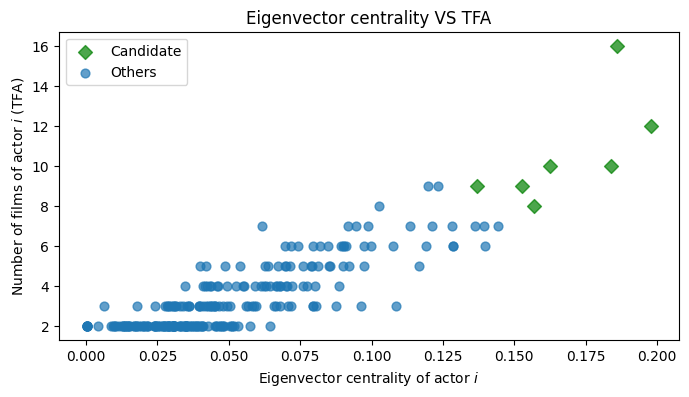

In [77]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(
    x=cand['eigenvector'],
    y=cand['Total_Film'],
    s=50,
    c="green",
    marker='D',
    alpha=0.7,
    label='Candidate'
    )
plt.scatter(
    x=ucand['eigenvector'],
    y=ucand['Total_Film'],
    s=40,
    cmap="blue",
    marker='o',
    alpha=0.7,
    label='Others'
    )
plt.xlabel("Eigenvector centrality of actor $\t{i}$ ")
plt.ylabel("Number of films of actor $\t{i}$ (TFA)")
plt.title(label="Eigenvector centrality VS TFA",loc="center")

# plot the legend
plt.legend(loc="upper left")
plt.savefig('Figure S4.jpg',dpi=500,bbox_inches = 'tight')
plt.show()

### Save network to Gephi

In [56]:
nx.write_gexf(G, 'actor_network.gexf')